In [1]:
version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

In [2]:
library(SpaTalk)

载入需要的程辑包：ggalluvial

载入需要的程辑包：ggplot2

载入需要的程辑包：doParallel

载入需要的程辑包：foreach

载入需要的程辑包：iterators

载入需要的程辑包：parallel



In [3]:
# load starmap data
load(paste0(system.file(package = 'SpaTalk'), "/extdata/starmap_data.rda"))
load(paste0(system.file(package = 'SpaTalk'), "/extdata/starmap_meta.rda"))

# create SpaTalk data
obj <- createSpaTalk(st_data = as.matrix(starmap_data),
                     st_meta = starmap_meta[, -4],
                     species = "Mouse",
                     if_st_is_sc = T,
                     spot_max_cell = 1)

In [4]:
# decode the cell-type composition
obj <- dec_celltype(object = obj,
                    sc_data = as.matrix(starmap_data),
                    sc_celltype = starmap_meta$celltype)

Performing Non-negative regression for each cell 
***Done*** 


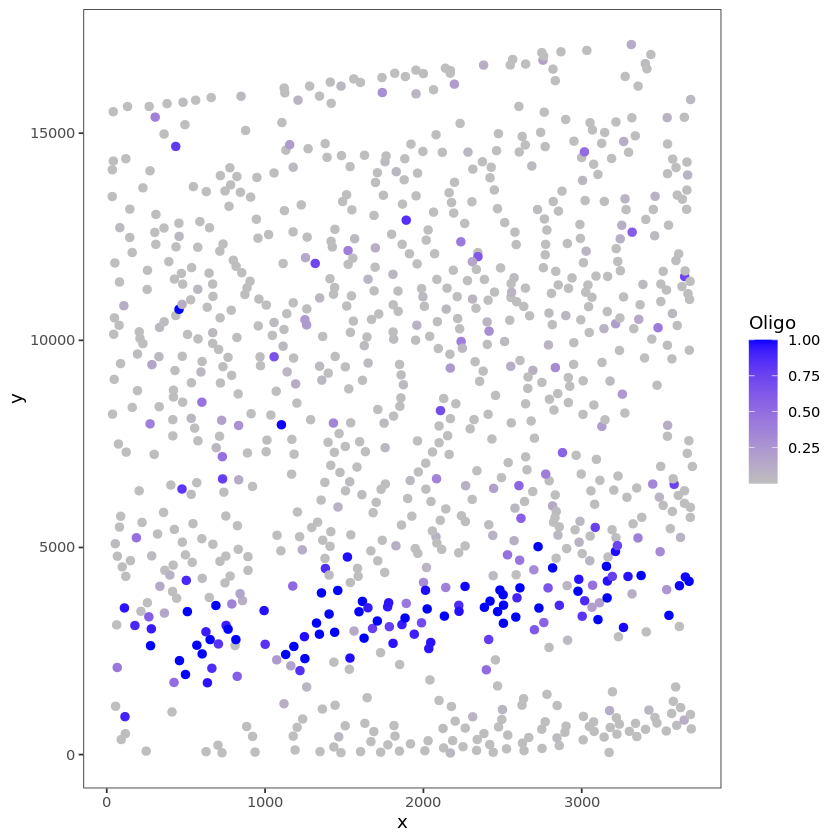

In [5]:
# plot cell-type percent across spatial cells
plot_st_celltype_percent(object = obj, celltype = 'Oligo',size = 2)

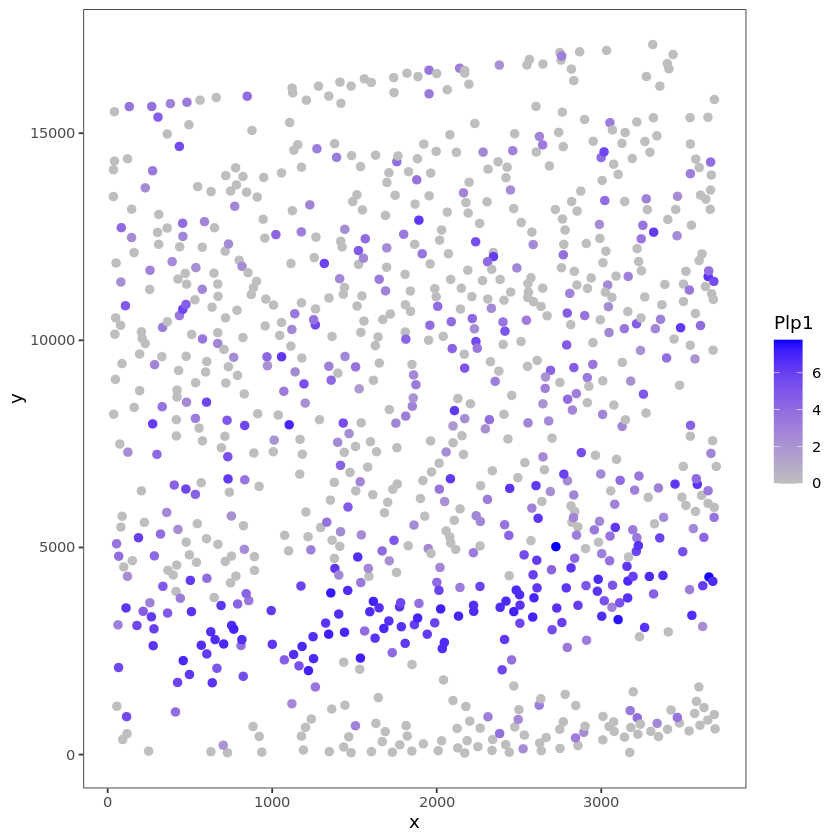

In [6]:
# plot marker gene expression across spatial cells
plot_st_gene(object = obj, gene = 'Plp1',size = 2, if_use_newmeta = F)

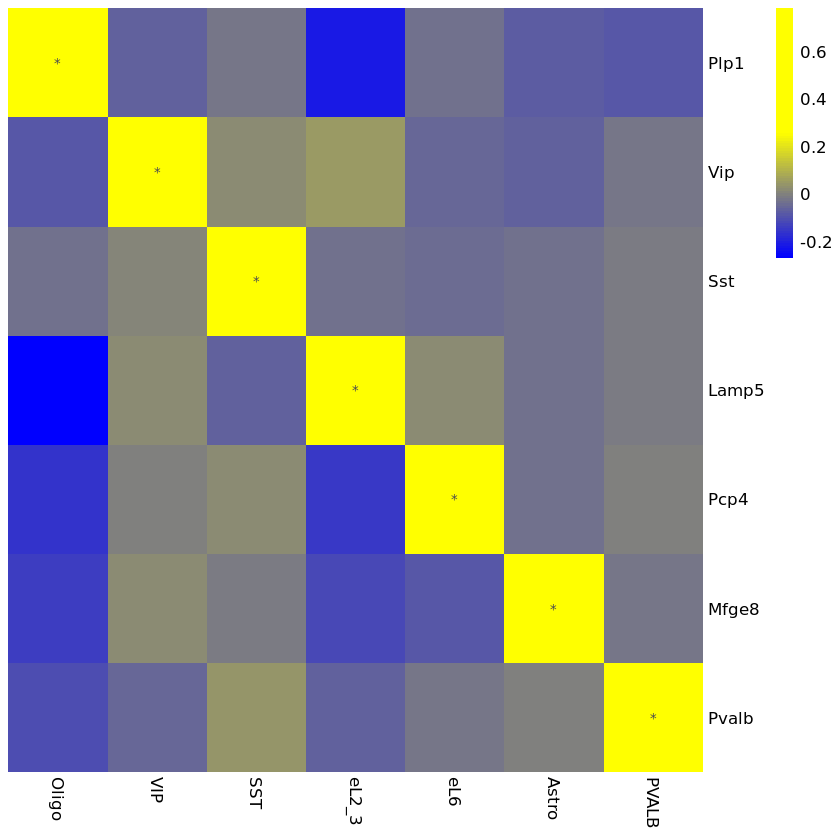

In [7]:
# correlation between marker gene expression and cell type percent across spatial cells
plot_st_cor_heatmap(object = obj,
                    marker_genes = c("Plp1","Vip","Sst","Lamp5","Pcp4","Mfge8","Pvalb"),
                    celltypes = c("Oligo","VIP","SST","eL2_3","eL6","Astro","PVALB"),
                    scale = "none",
                    color_low = 'blue',
                    color_high = 'yellow',
                    color_mid = 'yellow')

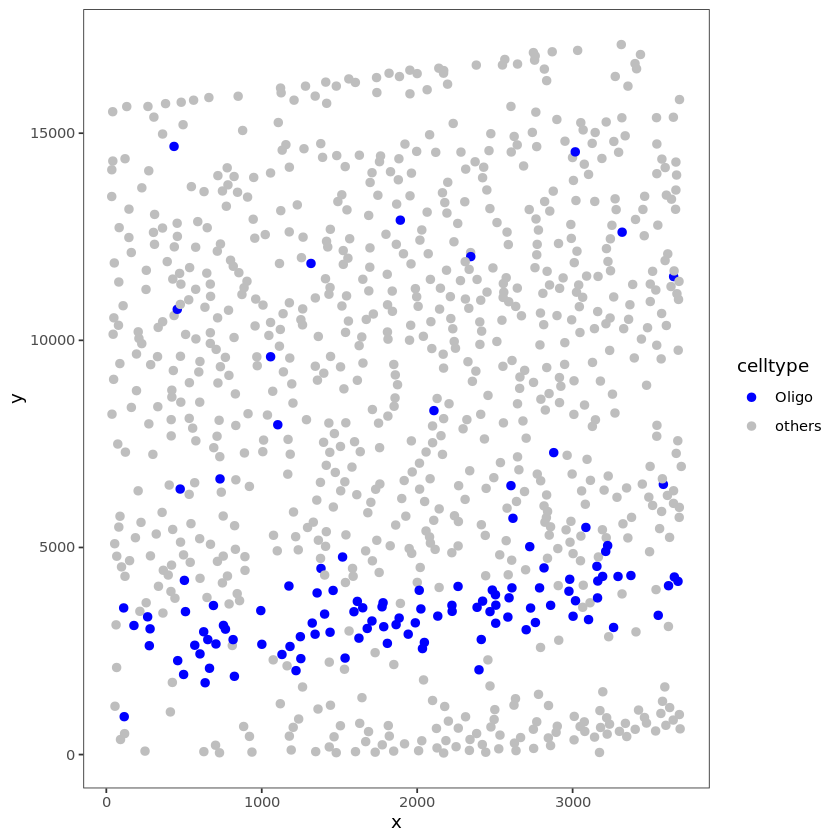

In [8]:
# plot cell type in reconstructed ST atlas
plot_st_celltype(object = obj, celltype = 'Oligo', size = 2)

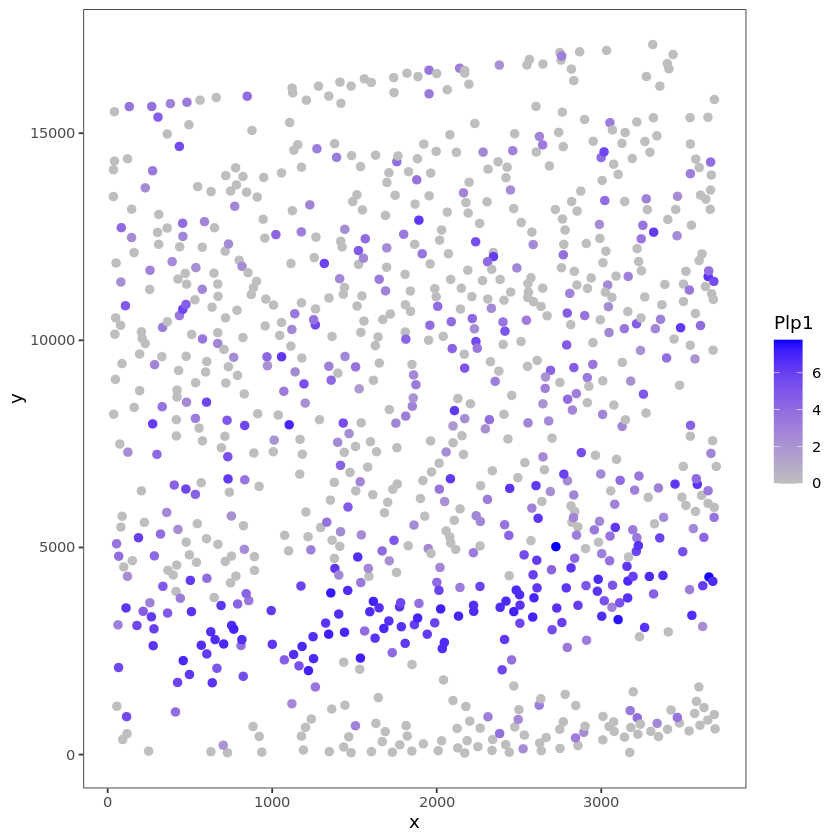

In [9]:
# plot marker gene expression in single-cell ST data
plot_st_gene(object = obj,gene = 'Plp1', if_use_newmeta = T, size = 2)

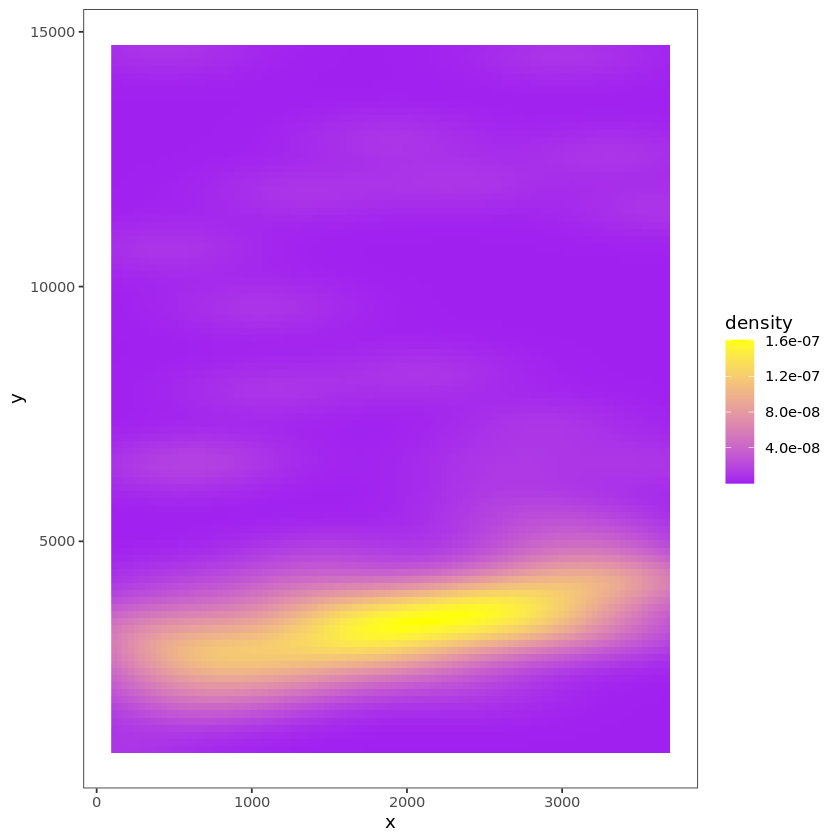

In [10]:
# plot cell-type density in single-cell ST data
plot_st_celltype_density(object = obj,
                         celltype = 'Oligo',
                         type = 'raster',
                         color_low = 'purple',
                         color_high = 'yellow')

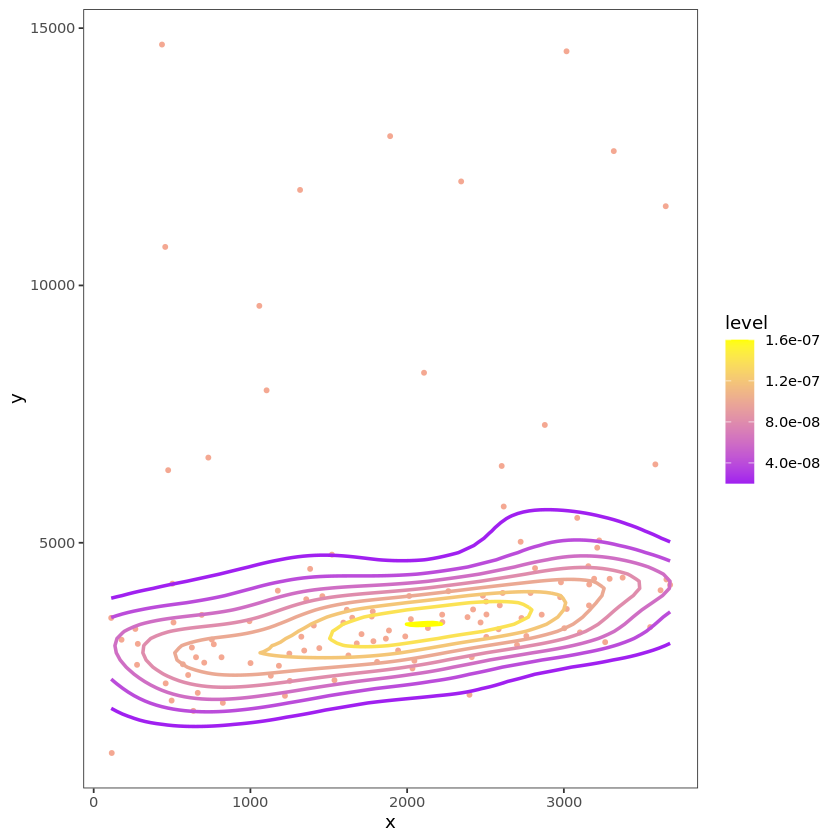

In [11]:
plot_st_celltype_density(object = obj,
                         celltype = 'Oligo',
                         type = 'contour',
                         color_low = 'purple',
                         color_high = 'yellow')

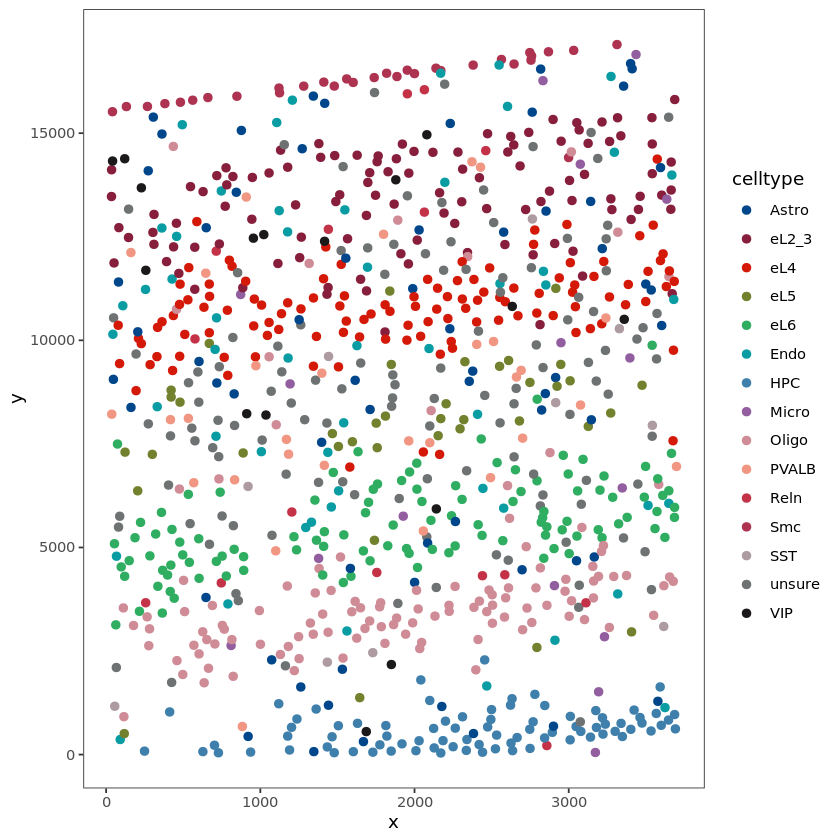

In [12]:
# plot all cell types in single-cell ST data
plot_st_celltype_all(object = obj, size = 2)

In [18]:
# Filter LRIs with downstream targets
obj <- find_lr_path(object = obj, lrpairs = lrpairs, pathways = pathways, use_n_cores = 10)

Checking input data 
Begin to filter lrpairs and pathways 
***Done*** 


In [19]:
# Infer all cell-cell communications
obj <- dec_cci_all(object = obj, use_n_cores = 10)

Note: there are 14 cell types and 182 pair-wise cell pairs 
Begin to find LR pairs 


In [20]:
obj@lrpair

,ligand,receptor,species,celltype_sender,celltype_receiver,lr_co_exp_num,lr_co_ratio,lr_co_ratio_pvalue,score
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
5,Inhba,Acvr1c,Mouse,eL6,PVALB,8,0.21621622,0.001,0.8545920
51,Inhba,Acvr1c,Mouse,Astro,eL2_3,8,0.09195402,0.042,0.8368716
1,Sst,Sstr2,Mouse,SST,PVALB,2,0.28571429,0.009,0.7072240
3,Apoe,Sdc4,Mouse,Smc,Astro,31,0.91176471,0.000,0.7094892
4,Ptn,Sdc4,Mouse,Smc,Astro,21,0.61764706,0.000,0.7094892
52,Inhba,Acvr1c,Mouse,eL5,PVALB,5,0.12500000,0.028,0.9252755
31,Apoe,Sdc4,Mouse,Reln,eL6,16,0.80000000,0.000,0.7122203
53,Inhba,Acvr1c,Mouse,Reln,HPC,4,0.44444444,0.001,0.9380385
54,Inhba,Acvr1c,Mouse,Micro,eL2_3,5,0.31250000,0.001,0.9380385


In [21]:
# Get LR and downstream pathways
obj_lr_path <- get_lr_path(object = obj,
                           celltype_sender = 'Smc',
                           celltype_receiver = 'Astro',
                           ligand = 'Apoe',
                           receptor = 'Sdc4')

obj_lr_path$tf_path

,src,dest,src_tf,dest_tf,hop,co_ratio,tf
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
986801,Sdc4,Ptk2,NO,NO,1,0.2058824,Smad3
30293,Ptk2,Mapk3,NO,NO,2,0.2647059,Smad3
300531,Mapk3,Smad3,NO,YES,3,0.2058824,Smad3
31652,Smad3,Acta2,YES,NO,4,0.2058824,Smad3


In [22]:
obj_lr_path$path_pvalue

celltype_sender,celltype_receiver,ligand,receptor,receptor_pathways,pvalue,gene_count,gene
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Smc,Astro,Apoe,Sdc4,Proteoglycans in cancer,0.0004492214,2,"Sdc4,Ptk2"
Smc,Astro,Apoe,Sdc4,HS-GAG biosynthesis,0.0298189799,1,Sdc4


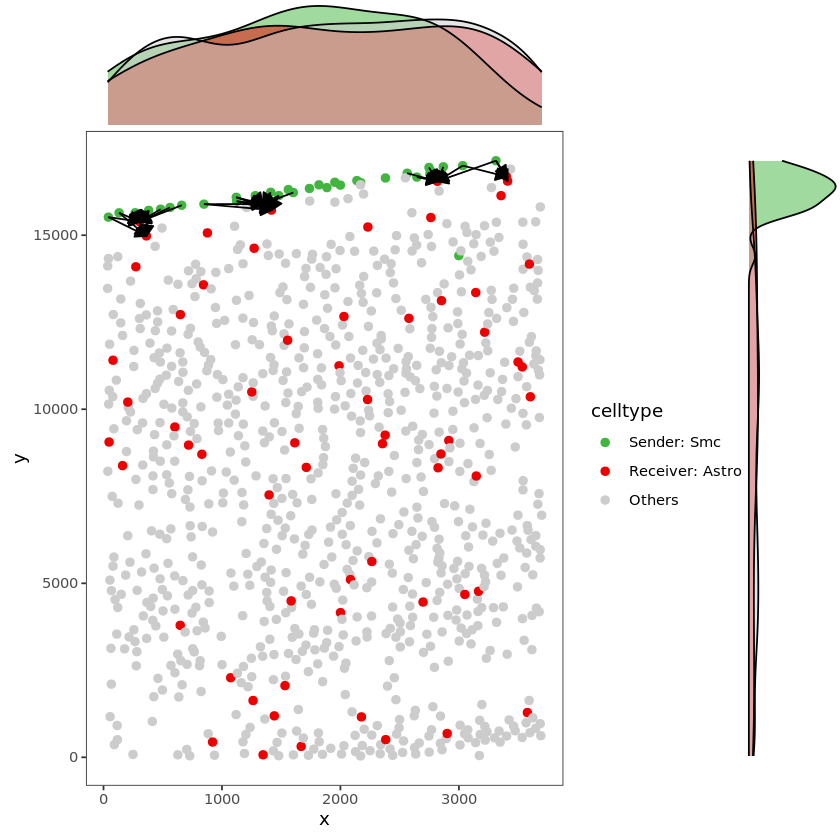

In [23]:
# Point plot with spatial distribution of celltype_sender and celltype_receiver
plot_ccdist(object = obj,
            celltype_sender = 'Smc',
            celltype_receiver = 'Astro',            
            size = 2,
            arrow_length = 0.1)

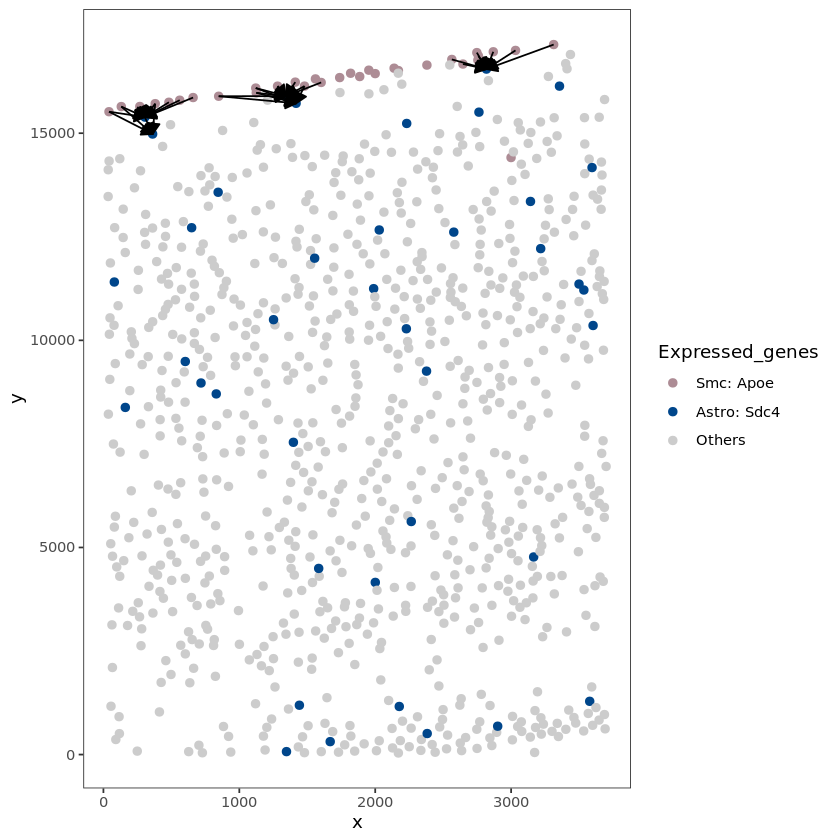

In [24]:
# Point plot with LR pair from celltype_sender to celltype_receiver
plot_lrpair(object = obj,
            celltype_sender = 'Smc',
            ligand = 'Apoe',
            celltype_receiver = 'Astro',
            receptor = 'Sdc4',
            if_plot_density = F,
            size = 2,
            arrow_length = 0.1)


	Wilcoxon rank sum test with continuity correction

data:  celltype_dist1 and celltype_dist2
W = 329453870, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0



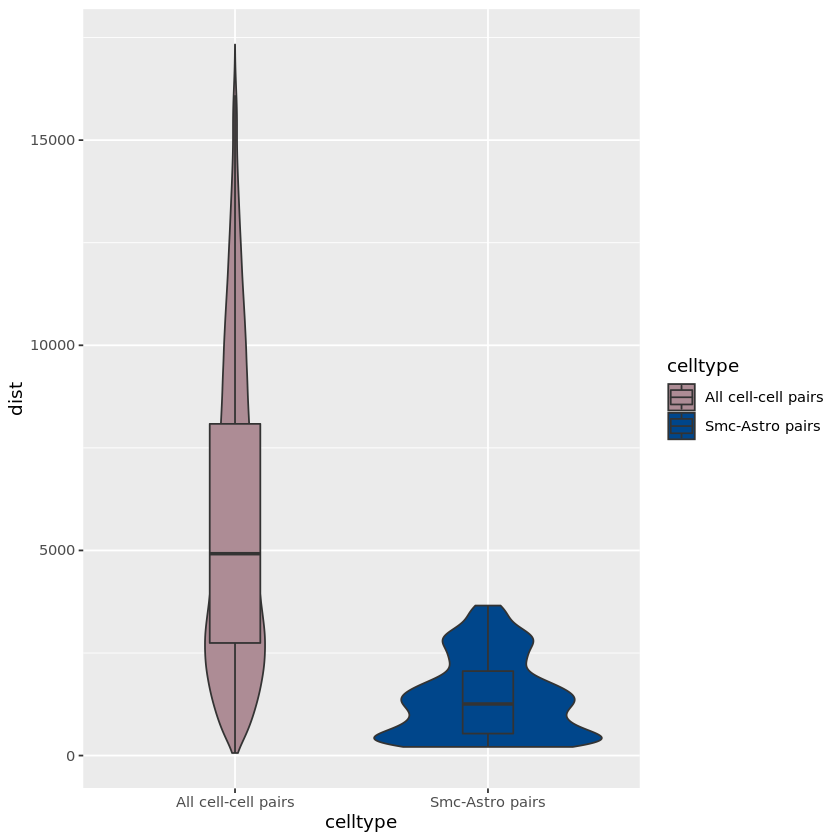

In [25]:
# Violin plot with spatial distance of LR pair between senders and receivers and between all cell-cell pairs
plot_lrpair_vln(object = obj,
                celltype_sender = 'Smc',
                ligand = 'Apoe',
                celltype_receiver = 'Astro',
                receptor = 'Sdc4')

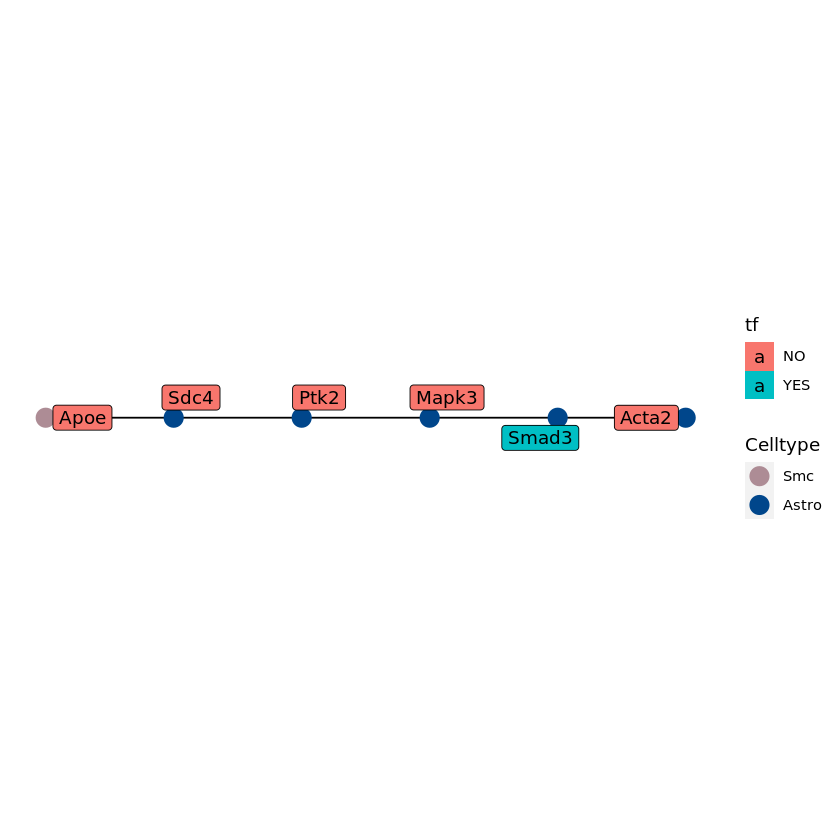

In [26]:
# Plot network with LR and downstream pathways
plot_lr_path(object = obj,                
             celltype_sender = 'Smc',
             ligand = 'Apoe',
             celltype_receiver = 'Astro',
             receptor = 'Sdc4')

Warning message:
“`spread_()` was deprecated in tidyr 1.2.0.
ℹ Please use `spread()` instead.
ℹ The deprecated feature was likely used in the ggalluvial package.
  Please report the issue at <https://github.com/corybrunson/ggalluvial/issues>.”
Warning message:
“The `.dots` argument of `group_by()` is deprecated as of dplyr 1.0.0.
ℹ The deprecated feature was likely used in the dplyr package.
  Please report the issue at <https://github.com/tidyverse/dplyr/issues>.”


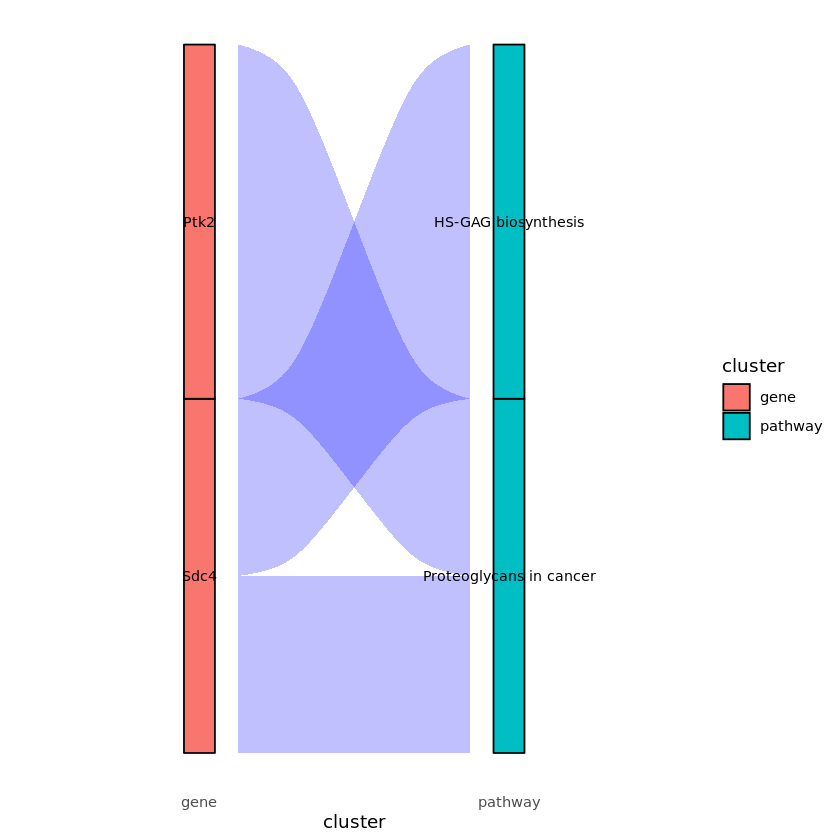

In [27]:
# River plot of significantly activated pathways and related downstream genes of receptors
plot_path2gene(object = obj,                
               celltype_sender = 'Smc',
               ligand = 'Apoe',
               celltype_receiver = 'Astro',
               receptor = 'Sdc4')